In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step1: Data Understanding & Preparation

### Understanding the Dataset

In [2]:
housing_df = pd.read_csv('Housing.csv')

In [3]:
housing_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Data Cleaning and Transformation

In [5]:
missing_values = housing_df.isnull().sum() #checking for any missing values in our dataset
missing_values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
nan_values = housing_df.isna().sum() #looking for nan values
nan_values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
duplicates = housing_df.duplicated() #lookinf for any duplicate values in our dataset
num_duplicates = duplicates.sum()
num_duplicates

0

### Identifying Outliers

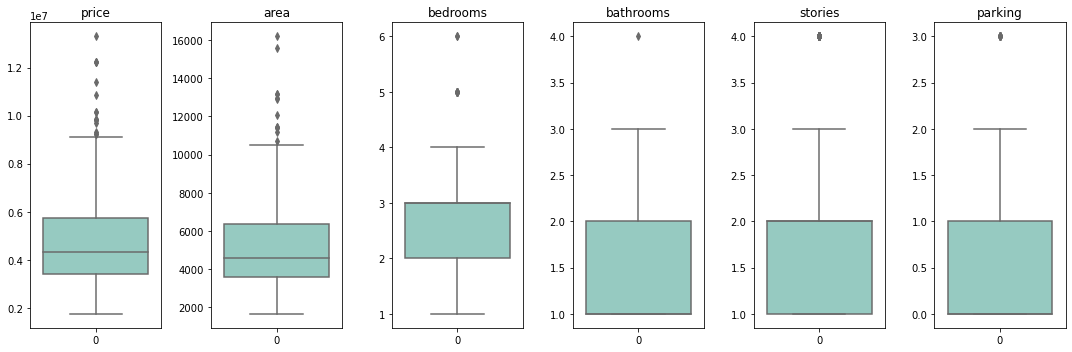

In [8]:
numeric_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'] #list of numeric columns
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(15, 5))

# Create colored box plots using Seaborn for each numeric column
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=housing_df[col], ax=axes[i], palette="Set3")
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [9]:
""""
Here, we can eliminate the outliers on the 'price' and 'area' column to get a more robust and solid analysis.
We are going to be using IQR to do this 

IQR formula = IQR75% - IQR25%"""

q1_price = np.percentile(housing_df['price'], 25)
q3_price = np.percentile(housing_df['price'], 75)
iqr_price = q3_price - q1_price
mean_price = housing_df['price'].mean()
median_price = housing_df['price'].median()

q1_area = np.percentile(housing_df['area'], 25)
q3_area = np.percentile(housing_df['area'], 75)
iqr_area = q3_area - q1_area
mean_area = housing_df['area'].mean()
median_area = housing_df['area'].median()

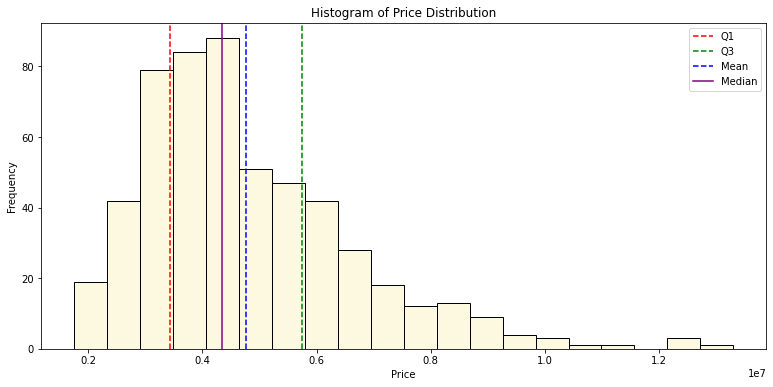

In [10]:
#I need to see first how the data is distributed so i can understand those values:
# Plot a histogram for the 'price' column
plt.figure(figsize=(13, 6))
sns.histplot(data=housing_df, x='price', bins=20, color='#fdf7d8', edgecolor='black')
plt.axvline(x=q1_price, color='r', linestyle='dashed', linewidth=1.5, label='Q1')  # Q1 line
plt.axvline(x=q3_price, color='g', linestyle='dashed', linewidth=1.5, label='Q3')  # Q3 line
plt.axvline(x=mean_price, color='b', linestyle='dashed', linewidth=1.5, label='Mean')  # Mean line
plt.axvline(x=median_price, color='purple', linestyle='solid', linewidth=1.5, label='Median')  # Median line

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price Distribution')
plt.legend()
plt.show()

The data points in the Price column is skewed to the right and that could indicate us the following insights:

- Higher Values: The right-skewed distribution suggests that there are relatively more lower-priced properties in the dataset, which is why the histogram has a peak on the left side.


- Few High-Value Outliers: The long tail on the right side of the histogram indicates that there are a few properties with very high prices (outliers), which are causing the tail to stretch towards the higher values.


- Skewed Average: In a right-skewed distribution, the mean (average) tends to be greater than the median. This is because the presence of a few high-priced properties pulls the mean towards the right.


- Market Characteristics: This distribution might reflect the nature of the housing market I am analyzing. It's common for housing prices to have a natural upper limit, but they can vary significantly on the lower end.

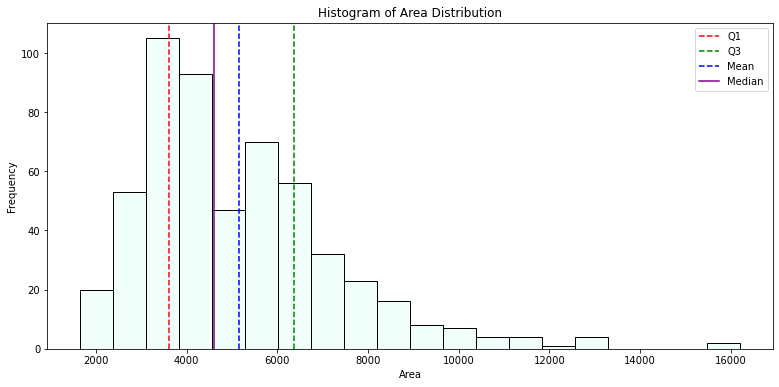

In [11]:
plt.figure(figsize=(13, 6))
sns.histplot(data=housing_df, x='area', bins=20, color='#ebfff9', edgecolor='black')
plt.axvline(x=q1_area, color='r', linestyle='dashed', linewidth=1.5, label='Q1')  # Q1 line
plt.axvline(x=q3_area, color='g', linestyle='dashed', linewidth=1.5, label='Q3')  # Q3 line
plt.axvline(x=mean_area, color='b', linestyle='dashed', linewidth=1.5, label='Mean')  # Mean line
plt.axvline(x=median_area, color='purple', linestyle='solid', linewidth=1.5, label='Median')  # Median line

plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Histogram of Area Distribution')
plt.legend()
plt.show()

Now, the data points in the 'area' column are skewed to the right as well, in terms of the real estate industry, we can come up with the following insights: 

- Larger Properties: A right-skewed distribution suggests that there are relatively more properties with larger areas in the dataset. The peak of the distribution would be towards the smaller area values, indicating that there are more smaller properties, but the long tail on the right side indicates the presence of a few properties with larger areas.


- Unique or Luxury Properties: The long tail on the right side could represent unique, luxury, or larger properties that are not as common as smaller properties. These could be high-end homes, estates, or properties with larger land areas.


- Suburban vs. Urban Areas: In some cases, right-skewed distributions in our 'area' column might reflect a mix of suburban and urban properties. Suburban properties tend to have larger areas, contributing to the longer tail on the right.

In [12]:
#We are going to manipulate the outliers on our 'price' column to have a more robust outcome
housing_df = housing_df[(housing_df['price'] >= q1_price - 1.5 * iqr_price) &
                        (housing_df['price'] <= q3_price + 1.5 * iqr_price)]

# Reset the index
housing_df = housing_df.reset_index(drop=True)

In [13]:
housing_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
1,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
2,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
3,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
4,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
526,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
527,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
528,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


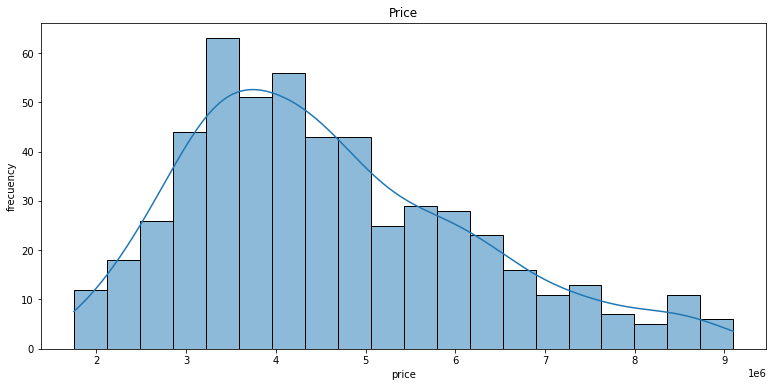

In [14]:
plt.figure(figsize=(13, 6))
sns.histplot(housing_df['price'], bins=20, kde=True)
plt.title('Price')
plt.xlabel('price')
plt.ylabel('frecuency')
plt.show()

In [15]:
# I dont think columns "furnishingstatus" and "prefarea" will be use for our analysis, so, lets get rid of them:
columns_to_drop = ['furnishingstatus', 'prefarea']
housing_df.drop(columns=columns_to_drop, inplace=True)

In [16]:
housing_df.head(3) #everything looks great so far

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking
0,9100000,6000,4,1,2,yes,no,yes,no,no,2
1,9100000,6600,4,2,2,yes,yes,yes,no,yes,1
2,8960000,8500,3,2,4,yes,no,no,no,yes,2


In [17]:
#one-hot encoding for categorical data variables into binary matrix:
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']
housing_df = pd.get_dummies(housing_df, columns=categorical_columns, drop_first=True)

In [18]:
housing_df.head(3)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes
0,9100000,6000,4,1,2,2,1,0,1,0,0
1,9100000,6600,4,2,2,1,1,1,1,0,1
2,8960000,8500,3,2,4,2,1,0,0,0,1


In [19]:
x = housing_df['mainroad_yes']
y = (housing_df['mainroad_yes'] == 0).sum()
print(y)

z = (housing_df['mainroad_yes'] == 1).sum()
print(z)

77
453


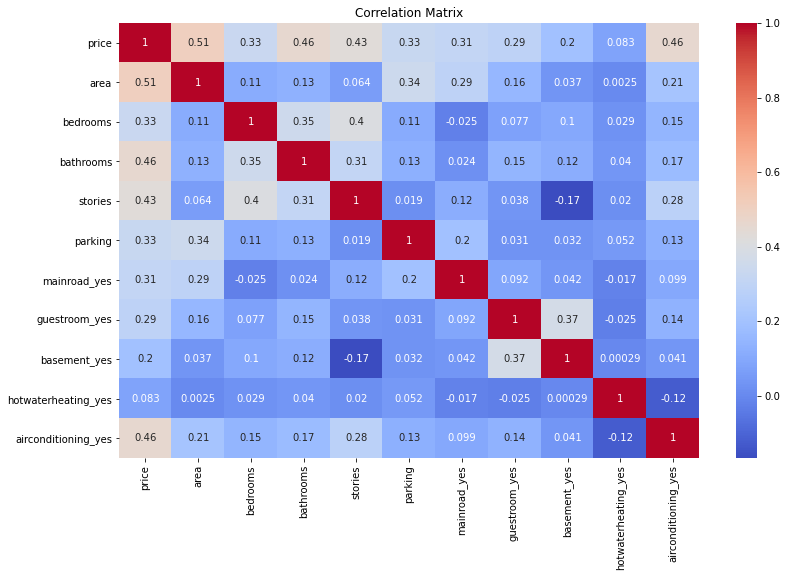

In [20]:
# Correlation matrix
correlation_matrix = housing_df.corr()
plt.figure(figsize=(13, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step2: Feature Data Engineering & Model Building

In our real estate project, we're digging into the details that shape property values. We're exploring factors like room counts and price per area to understand what drives prices. This helps our predictions get sharper, giving everyone a clearer picture when it comes to real estate decisions. It's about unlocking insights that make property transactions more informed and rewarding by going beyind the basic raw data.

In [21]:
housing_df['total_rooms'] = housing_df['bedrooms'] + housing_df['bathrooms'] + housing_df['stories'] + housing_df['guestroom_yes']
housing_df['price_per_area'] = housing_df['price'] / housing_df['area']
housing_df['rooms_to_bedrooms_ratio'] = housing_df['total_rooms'] / housing_df['bedrooms']
housing_df['total_amenities'] = housing_df[['airconditioning_yes', 'parking', 'basement_yes', 'hotwaterheating_yes']].sum(axis=1)

housing_df.head()


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,total_rooms,price_per_area,rooms_to_bedrooms_ratio,total_amenities
0,9100000,6000,4,1,2,2,1,0,1,0,0,7,1516.666667,1.750000,3
1,9100000,6600,4,2,2,1,1,1,1,0,1,9,1378.787879,2.250000,3
2,8960000,8500,3,2,4,2,1,0,0,0,1,9,1054.117647,3.000000,3
3,8890000,4600,3,2,2,2,1,1,0,0,1,8,1932.608696,2.666667,3
4,8855000,6420,3,2,2,1,1,0,0,0,1,7,1379.283489,2.333333,2


Here, I will explain the why of each of the new features I created:

-  Total Rooms (bedrooms + bathrooms + stories): The total number of rooms in a property could be a strong indicator of its size and potential value. Combining information from bedrooms, bathrooms, and stories can provide a holistic view of the property's space.


-  Price per Area (price / area): Price per unit area can help normalize the effect of the property's size on its price. Some buyers might be interested in the value they get for each square unit of area.


-  Total Rooms to Bedrooms Ratio (total_rooms / bedrooms): This ratio can provide insights into the configuration of the property. A higher ratio might indicate more rooms relative to bedrooms, which could be appealing to certain buyers.


-  Total Amenities (sum of air conditioning, parking, basement, hotwaterheating): Properties with more amenities might be more attractive to buyers and potentially command higher prices.

By creating these features, we're capturing additional information that could be relevant to property prices. These features help our model understand various aspects of the properties beyond the original features, potentially leading to better predictions. 

In [22]:
from scipy.stats import pearsonr 

In [23]:
price_totalrooms_correlation, p = pearsonr(housing_df.price, housing_df.total_rooms)

In [25]:
print("Correlation between Price & Total Rooms is: ", price_totalrooms_correlation.round(2))

Correlation between Price & Total Rooms is:  0.57


In [26]:
price_rooms_to_bedrooms_ratio, p = pearsonr(housing_df.price, housing_df.rooms_to_bedrooms_ratio)

In [27]:
print("Correlation between Price & Rooms and Bedrooms Ratio is: ", price_rooms_to_bedrooms_ratio.round(2))

Correlation between Price & Rooms - Bedrooms Ratio is:  0.37


In [29]:
price_amenities_correlation, p = pearsonr(housing_df.price, housing_df.total_amenities)

In [30]:
print("Correlation between Price& # amenities is: ", price_amenities_correlation.round(2))

Correlation between Price& # amenities is:  0.52


In [31]:
area_amenities_correlation, p = pearsonr(housing_df.area, housing_df.total_amenities)

In [33]:
print("Correlation between Area & # amenities is: ", area_amenities_correlation.round(2))

Correlation between Area & # amenities is:  0.35


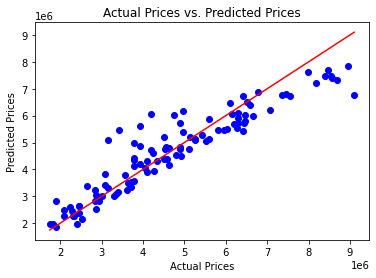

In [45]:
X = housing_df.drop(columns=['price'])
y = housing_df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Visualize the predictions vs. actual prices
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-', label="Perfect Prediction")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

# Note

Here the charts reveals how well our predicted prices match the actual prices. If the points are closely aligned with the red line, it means our predictions are accurate. This insight is crucial for developers to make informed decisions about property pricing, investments, and potential profitability. It ensures that pricing strategies are based on reliable estimates, minimizing the risk of overpricing or underpricing properties.